<a href="https://colab.research.google.com/github/2001256/2001256/blob/main/%EC%95%88%EC%A7%80%EB%AF%BC11%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#11강-1, 14주차 
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
cancer = load_breast_cancer()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [5]:
tree = DecisionTreeClassifier(random_state=0)

In [6]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [7]:
print('Training Accuracy: {:,3f}',format(tree.score(X_train,y_train)))
print('Test Accuracy: {:,3f}',format(tree.score(X_test,y_test)))

Training Accuracy: {:,3f} 1.0
Test Accuracy: {:,3f} 0.9370629370629371


In [8]:

#Max_depth control 하기
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [9]:
print('Training Accuracy: {:,3f}',format(tree.score(X_train,y_train)))
print('Test Accuracy: {:,3f}',format(tree.score(X_test,y_test)))

Training Accuracy: {:,3f} 0.9882629107981221
Test Accuracy: {:,3f} 0.951048951048951


In [10]:
from sklearn.tree import export_graphviz

In [11]:
export_graphviz(tree, out_file='tree.dot', class_names=["0","1"])

In [12]:
import graphviz

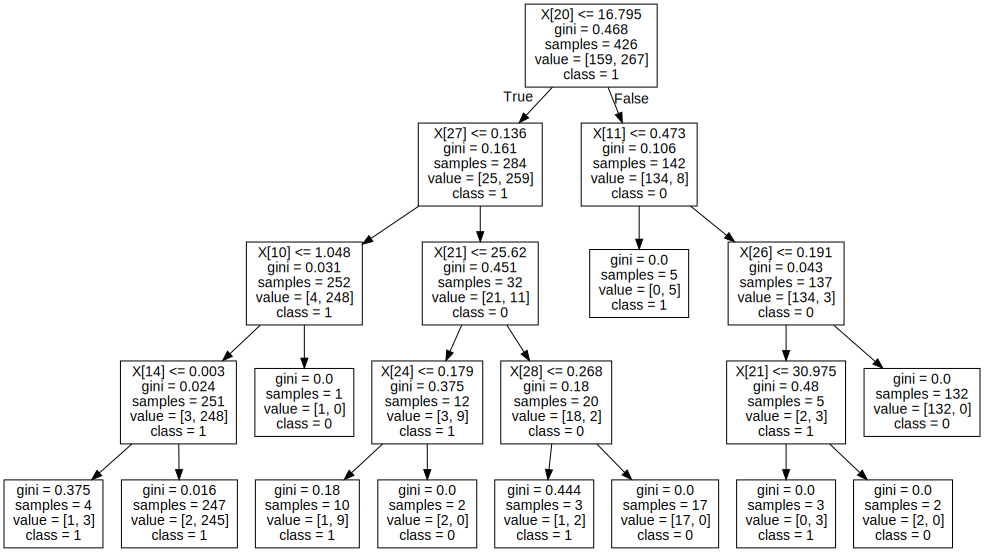

In [13]:
#Grephviz module 가져오기
with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [14]:
export_graphviz(tree, out_file='tree.dot', class_names=["0","1"], feature_names=cancer.feature_names, impurity=False, filled=True)

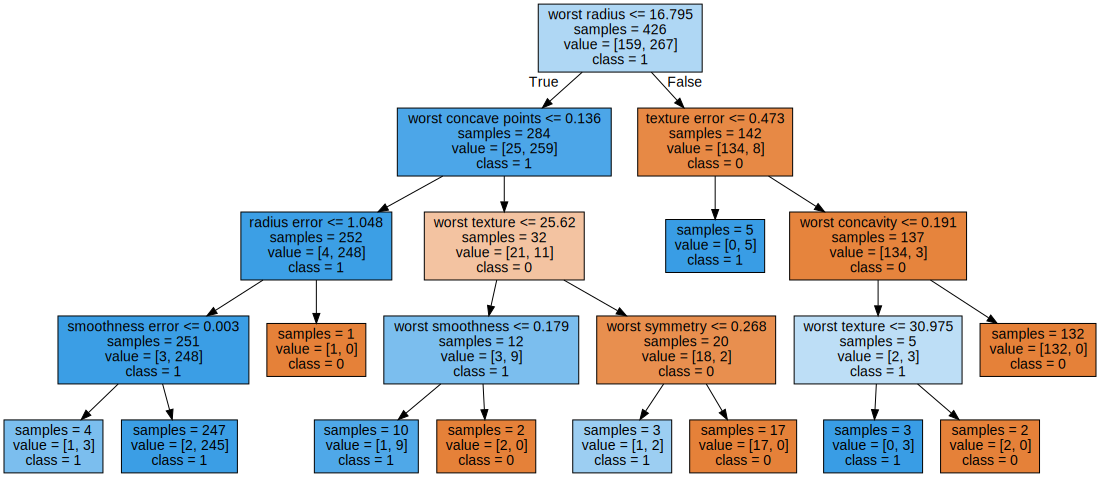

In [15]:
with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [16]:
#tree.feature_importances_ 출력결과
print("Feature importance: \n", tree.feature_importances_)

Feature importance: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [17]:
import numpy as np
import matplotlib.pyplot as plt

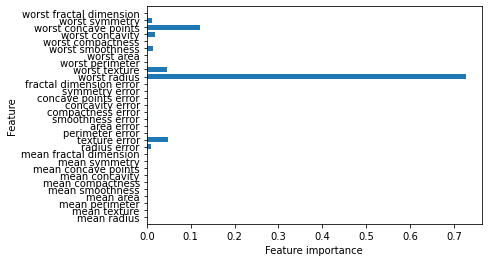

In [18]:
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

In [19]:
#Boston data 에 적용
from sklearn.datasets import load_boston

In [20]:
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=42)

11_2 , 15주차

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
tree = DecisionTreeRegressor(random_state =0)

In [25]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

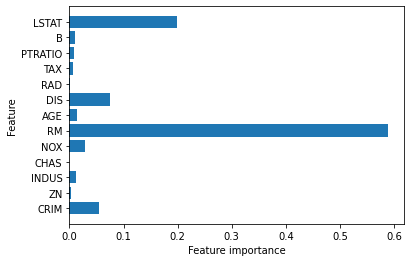

In [26]:
n_features = boston.data.shape[1]
plt.barh(np.arange(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), boston.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

In [27]:
#random forest 
from sklearn.ensemble import RandomForestClassifier

In [28]:
from sklearn.datasets import make_moons

In [29]:
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)

In [30]:
forest = RandomForestClassifier(n_estimators=5)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [31]:
print('Training Accuracy: {:,3f}',format(forest.score(X_train,y_train)))
print('Test Accuracy: {:,3f}',format(forest.score(X_test,y_test)))

Training Accuracy: {:,3f} 1.0
Test Accuracy: {:,3f} 0.92


In [32]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 12.5 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=b781773df4be0fabe73be81233c7171d00888f098f0cf59081671b824cffe844
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [33]:
import mglearn

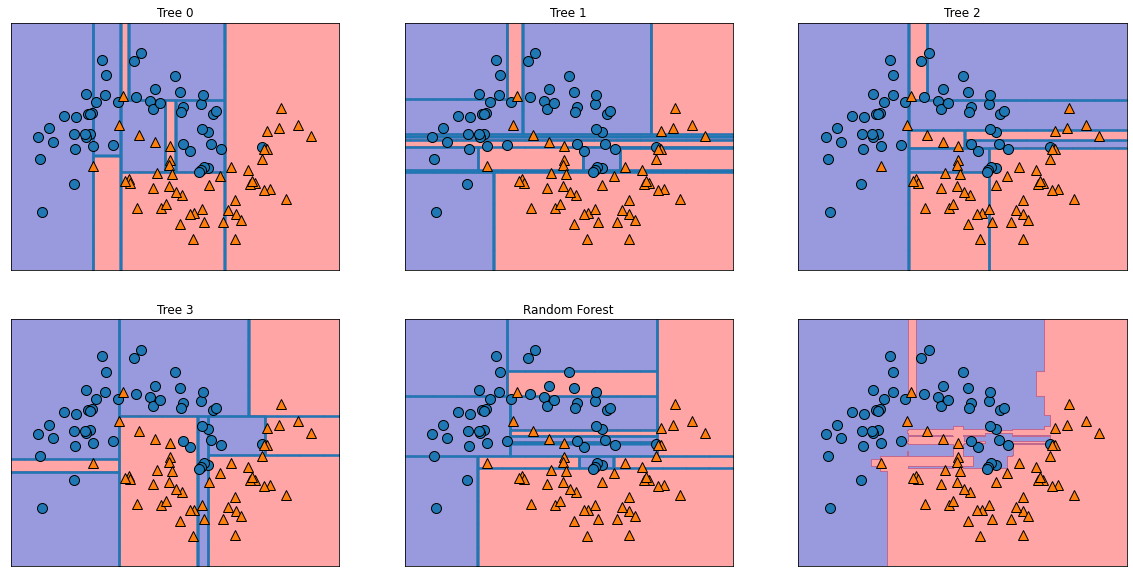

In [34]:
#forest 시각화하기
fig,axes =plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1], alpha=0.4)
axes[-1,1].set_title('Random Forest')
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [35]:
#유방암 데이터 셋에 적용 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [36]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

print('Training Accuracy: {:,3f}',format(forest.score(X_train,y_train)))
print('Test Accuracy: {:,3f}',format(forest.score(X_test,y_test)))

Training Accuracy: {:,3f} 1.0
Test Accuracy: {:,3f} 0.9440559440559441


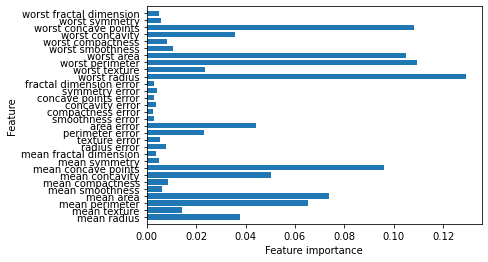

In [37]:
#Feature importance
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.ylim(-1, n_features)
plt.show()

16주차 11_3

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
gb = GradientBoostingClassifier(random_state = 0)
gb.fit(X_train,y_train)
print("Training Accuracy: {:,3f}",format(gb.score(X_train,y_train)))
print("Test Accuracy: {:,3f}",format(gb.score(X_test,y_test)))

Training Accuracy: {:,3f} 1.0
Test Accuracy: {:,3f} 0.958041958041958


In [41]:
gb = GradientBoostingClassifier(max_depth=1, random_state = 0)
gb.fit(X_train,y_train)
print("Training Accuracy: {:,3f}",format(gb.score(X_train,y_train)))
print("Test Accuracy: {:,3f}",format(gb.score(X_test,y_test)))

Training Accuracy: {:,3f} 0.9953051643192489
Test Accuracy: {:,3f} 0.965034965034965


In [42]:
gb = GradientBoostingClassifier(max_depth=4, learning_rate = 0.01, n_estimators=300, random_state = 0)
gb.fit(X_train,y_train)
print("Training Accuracy: {:,3f}",format(gb.score(X_train,y_train)))
print("Test Accuracy: {:,3f}",format(gb.score(X_test,y_test)))

Training Accuracy: {:,3f} 1.0
Test Accuracy: {:,3f} 0.9440559440559441


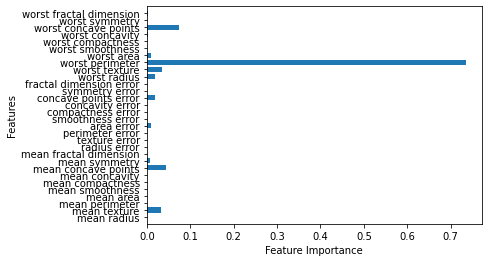

In [43]:
#Feature importance
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), gb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.ylim(-1, n_features)
plt.show()

In [47]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
import pydot

In [59]:
pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 13.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 37.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 47.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 45.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 3.2 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516314 sha256=bdbdd3de9bd0510493fe206b77e0e952fbf7eee94b3e8fe37cdb5a26e22300e7
  Stored in directory: /root/.cache/pip/whe

In [61]:
import cartopy

In [64]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor()

In [73]:
import xgboost

In [75]:
from xgboost import XGBClassifier

In [76]:
#X-G-Boost 사용하기
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
print("Training Accuracy: {:,3f}",format(gb.score(X_train,y_train)))
print("Test Accuracy: {:,3f}",format(gb.score(X_test,y_test)))

Training Accuracy: {:,3f} 1.0
Test Accuracy: {:,3f} 0.9440559440559441


In [77]:
xgb = XGBClassifier(max_depth=4, learning_rate=0.01, n_estimators=100, random_state=0)
xgb.fit(X_train,y_train)
print("Training Accuracy: {:,3f}",format(gb.score(X_train,y_train)))
print("Test Accuracy: {:,3f}",format(gb.score(X_test,y_test)))

Training Accuracy: {:,3f} 1.0
Test Accuracy: {:,3f} 0.9440559440559441


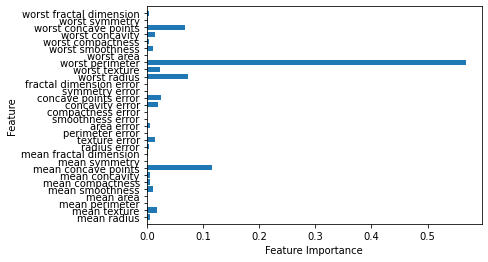

In [78]:
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), xgb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()